Execution for house price estimation

In [1]:
# Import relevant files and libraries
import DataProcessor
import sys
import LRegression
import NLRegression
import performance_metrics
import Kmeans
import UserInterface

Define the parameters



In [2]:
# Allocate 80% of data to training
train_size = 0.8

# Identify features to be used
columnsToKeep = ['Price','Type','Bedroom','Bathroom','Car','Landsize','BuildingArea','Latitude','Longitude']
#columnsToKeep = ['Price', 'Bedroom', 'Bathroom']
#columnsToKeep = ['Price', 'Type', 'Landsize', 'BuildingArea']

# Path to dataset.
filepath = '../dataset/Melbourne_housing_FULL.csv'

# Identify prediction (ground truth)
prediction_column = 'Price'

Process raw data

Data Processor object created


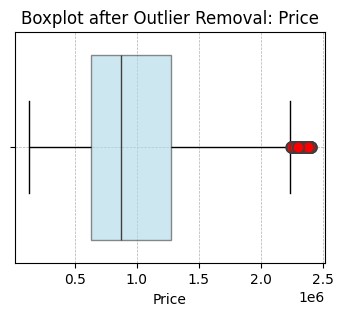

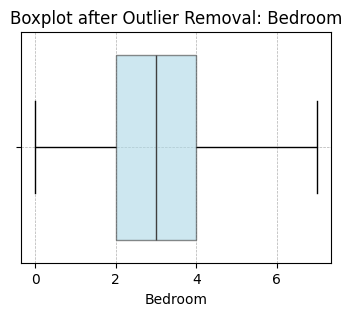

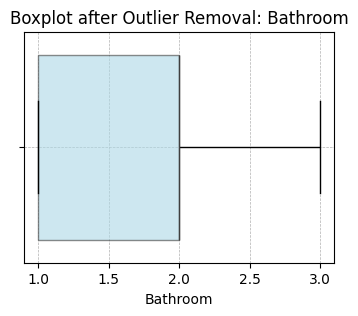

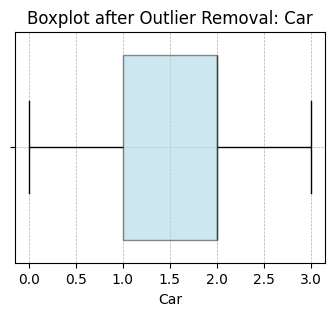

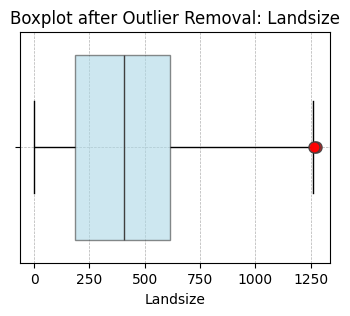

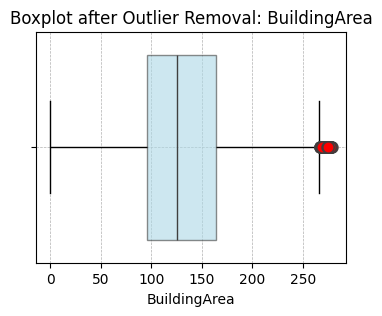

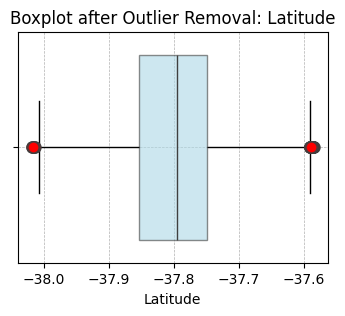

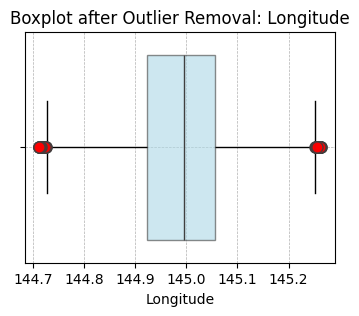

Number of rows removed: 1935
Number of rows remaining: 7438
training size 1600
test size 400


In [3]:
# Create a DataProcessor object and load the data
dp_obj = DataProcessor.DataProcessor()
dp_obj.LoadData(filepath)

# Remove incomplete points, remove unused features and shuffle the data
dp_obj.keepSelectedColumns(columnsToKeep)
dp_obj.filterMelbourneData()

dp_obj.remove_outliers(columnsToKeep, plot=False)

# dp_obj.encodeCategoricalData(['Type'])
dp_obj.shuffleData()
dp_obj.reduceDataSize(2000) # remove this to train on the full dataset

# Split the data into training and testing
train_X, train_Y, test_X, test_Y = dp_obj.splitData(train_size, prediction_column)

# print(train_X.head())

# Remove dwelling type and additional landsize / building area data for some processing
clean_columns = ['Type', 'Landsize','BuildingArea']
train_X_clean = train_X.drop(columns=clean_columns,axis=1)
test_X_clean = test_X.drop(columns=clean_columns,axis=1)

K-Means Clustering

In [ ]:
# Ashton
k = 3
# prefs = ['Type','Bedroom','Bathroom','Car','Landsize','BuildingArea','Latitude','Longitude']
prefs = ['Type','Bedroom','Bathroom','Car','Landsize','BuildingArea','Latitude','Longitude']

# all_points = []
# all_centroids = []

# for pref in prefs:
#     kmeans = Kmeans.Kmeans(train_X, train_Y, k, pref)

#     train_X, points, centroids = kmeans.cluster()

#     all_points.append(points)
#     all_centroids.append(centroids)

#     kmeans.plotKmean(train_X, points, centroids, pref)

kmeans = Kmeans.Kmeans(train_X, train_Y, k, prefs)

train_X, points, centroids = kmeans.cluster()

# all_points.append(points)
# all_centroids.append(centroids)

# kmeans.plotKmean(train_X, points, centroids, prefs)

# print(train_X.columns)


Linear Regression

In [5]:
# TEMPORARY
# k = 5
# pref = 'Size'
# km = kmeans.Kmeans(train_X_clean,train_Y,k,pref)

# train_X, points, centroids = km.cluster()
# print(train_X['Assignment'].shape)

In [6]:
lr = LRegression.LRegression()
for i in range(k):
    features = train_X[train_X['Assignment'] == i]
    features = features.drop('Assignment',axis=1)
    targets = train_Y[train_X['Assignment'] == i]
    y_pred = lr.LinearRegression(features=features,target=targets)
    print(y_pred)

KeyError: 'Assignment'

In [7]:
lr = LRegression.LRegression()
assignments = train_X['Assignment']
# features = train_X.drop('Assignment',axis=1)
features = train_X
models = lr.LinearReg(assignments,features,train_Y)

KeyError: 'Assignment'

In [ ]:
# Train
lr = LRegression.LRegression()
y_pred = []
# for i in range(k):
#     y_pred.append(lr.LinReg(features=train_X,target=train_Y,assignment=i))
y_pred = lr.LinReg(features=train_X,target=train_Y,assignment=train_X['Assignment'])

In [ ]:
# Test


Non-Linear Regression (Gaussian Processing)

In [8]:
# Train

# ask to train or load a model
query = input("Do you want to train a new model? (y/n): ")
if query == 'y':
    # Ask user for features to train on
    featuresToTrain = ['Size','Latitude','Longitude']
    nlr = NLRegression.NLRegression(train_X, train_Y, test_X, test_Y, featuresToTrain)
    nlr.train()
    nlr.saveModel()
else:
    featuresToTrain = ['Size','Latitude','Longitude']
    nlr = NLRegression.NLRegression(train_X, train_Y, test_X, test_Y, featuresToTrain)
    nlr.loadModel('../saved_models/nlr_model.pkl')

# options: 'Type','Bedroom','Bathroom','Car','Size','Latitude','Longitude'


c:\Users\awlp8\miniconda3\envs\ai4robotics\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\awlp8\miniconda3\envs\ai4robotics\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


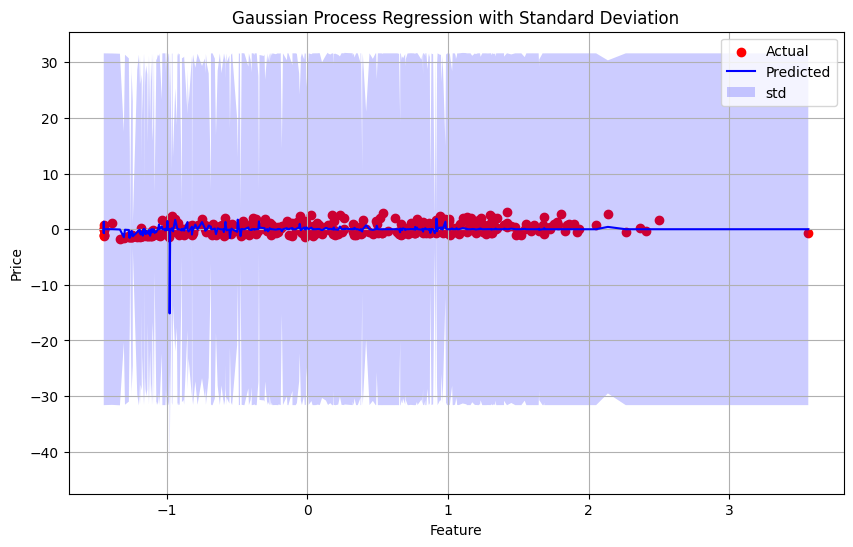

In [9]:
# save the model


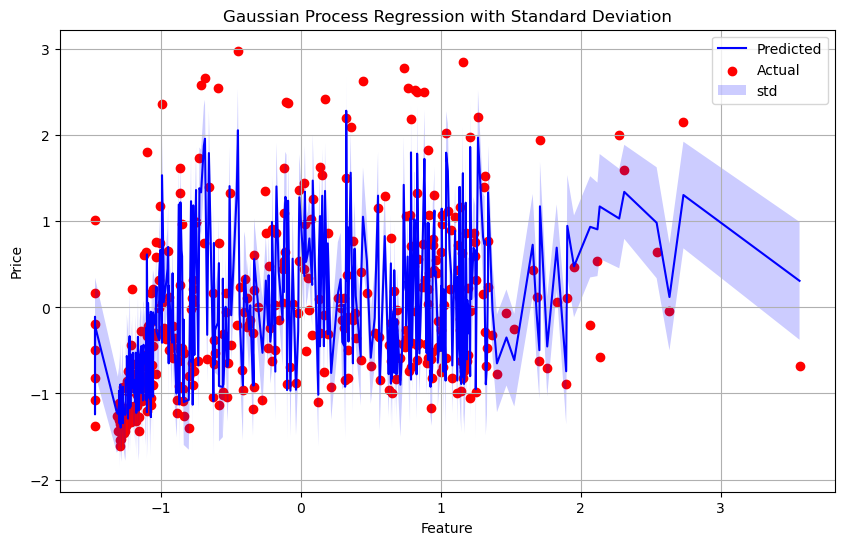

In [5]:
# plotting predictions vs expected
nlr.plot()

In [10]:
# Quick Test
nlr.evaluate()

R² Score: -0.5505382529942373


-0.5505382529942373

In [11]:
# slow but more accurate test
nlr.cross_validate()

Cross-Validation Scores (R²): [0.00433063 0.00622906 0.25508916]
Mean R²: 0.08854961774430407, Standard Deviation: 0.11776379335915566


In [7]:
# Select a sample row and keep it as a Series
sample_number = 300

sample = test_X[featuresToTrain].iloc[sample_number]
print("sample: ", sample.values)

# Predict using the model with the scaled data
pred, bounds = nlr.predictActual(sample)
print("prediction: ", pred[0])
# print("bounds:     ", bounds[0], bounds[1])
print("actual:     ", test_Y.iloc[sample_number])

sample:  [566.     -37.8008 145.0353]
prediction:  1836523.0223228852
actual:      2015000.0


Evaluation Metrics

Data Processor object created


c:\Users\awlp8\miniconda3\envs\ai4robotics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\awlp8\miniconda3\envs\ai4robotics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\awlp8\miniconda3\envs\ai4robotics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\awlp8\miniconda3\envs\ai4robotics\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

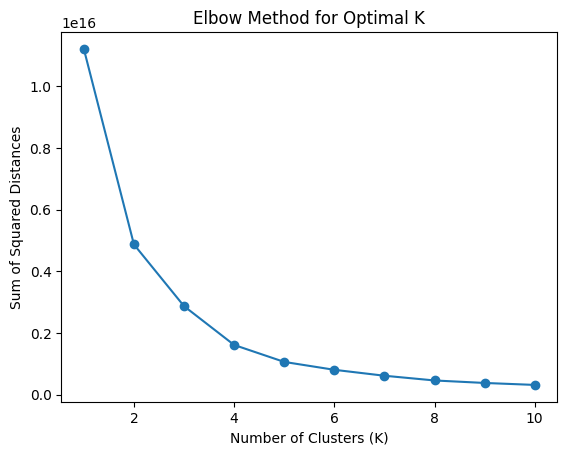

Optimal number of clusters: 1


In [12]:
from performance_metrics import ElbowMethod
from DataProcessor import DataProcessor
import pandas as pd
from sklearn.impute import SimpleImputer

# Identify features to be used (excluding 'Type')
columnsToKeep = ['Price', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Latitude', 'Longitude']

# Path to dataset
filepath = '../dataset/Melbourne_housing_FULL.csv'

# Step 1: Load and preprocess the data
data_processor = DataProcessor()
data = data_processor.LoadData(filepath)

# Drop columns that are not relevant or cannot be converted to numeric
data = data_processor.keepSelectedColumns(columnsToKeep)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 2: Use the ElbowMethod class with the preprocessed data
elbow_method = ElbowMethod(data)  # Initialize ElbowMethod
elbow_method.evaluate(max_clusters=10)
elbow_method.plot()
optimal_clusters = elbow_method.optimal_number_of_clusters()
print("Optimal number of clusters:", optimal_clusters)


In [ ]:
from performance_metrics import calculate_silhouette_score
# Assuming kmeans.cluster() returns x_new, points, centroids
x_new, points, centroids = kmeans.cluster()
assignment = x_new['Assignment' + pref].values  # Extract the cluster assignments

silhouette_avg = calculate_silhouette_score(points, assignment)
print("Silhouette Score:", silhouette_avg)

User input for preference

In [ ]:
# Calculate mean values if no user preference is provided
meanLand = dp_obj.getAverage('Landsize')
meanBuilding = dp_obj.getAverage('BuildingArea')

# Input user preferences
user_pref = UserInterface.UserInterface()
type, bedrooms, bathrooms, car, size, latitude, longitude = user_pref.Inputs(meanLand, meanBuilding)
print(type,bedrooms,bathrooms,car,size,latitude,longitude)

Final prediction

In [ ]:
# Return predicted value from best performing model
targets = [type,bedrooms,bathrooms,car,size,latitude,longitude]
pred = lr.predict(features=targets)